In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import category_encoders as ce

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_parquet('./features.parquet')

In [4]:
X = df.iloc[:,1:]

y = df['Churn']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Logistic Regression

In [7]:
encoder = ce.BinaryEncoder(cols=X_train.columns.tolist())

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [8]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_pred_test = model.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7722


In [11]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.7934
Test set score: 0.7722


# Decision Tree

## key words
- Root node: first node with no division (contains entire population/sample)
- Splitting: process of dividing
- Sub-node: node -> sub-node -> ...
- Pruning: remove sub-node. Opposite of splitting
- Leaf: edge node

## intuition
- Each attribute(feature) forms a node. The most importante becomes de root node
- The leaf node is the Decision Tree outcome

In [6]:
encoder = ce.OrdinalEncoder(cols=X_train.columns.tolist())


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [17]:
decision_tree = DecisionTreeClassifier(max_depth=3)

decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

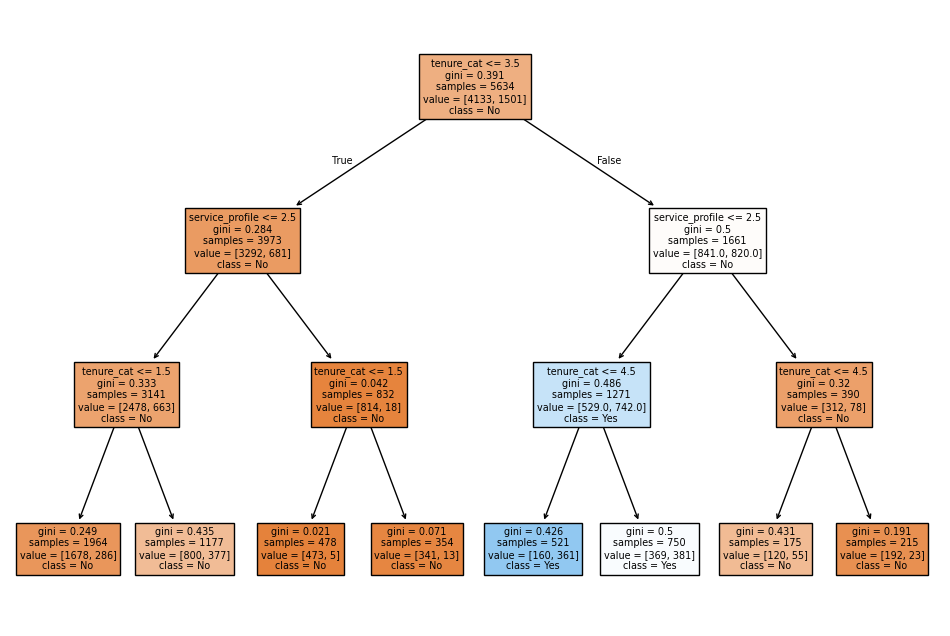

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, feature_names=X_train.columns, class_names=list((set(y_train))))
plt.show()

# Attribute Selection: used to decide which attribute will be user as root, the order is important. Information Gain for cat and Gini Index for continuous.

In [10]:
y_pred_test = decision_tree.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_test)

0.7537260468417317

# Catboost

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


clf.fit(X_train, y_train, 
        cat_features=X.columns.tolist(), 
        eval_set=(X_train, y_train), 
        verbose=False
)

# XGBoost